# Naive Bayes Classifier
## Ghazal Kalhor

<div style="text-align: justify; font-weight: bold;">
<i>Abstract</i> — In this computer assignment, , we want to classify given comments into two classes (positive and negative); this is done by using the Naive Bayes Classification that we learnt in Artificial Intelligence.
    
<i>Keywords</i> — Artificial Intelligence, Naive Bayes Classification
 </div>

### Introduction
<br/>
<div style="text-align: justify;"> 
The aim of this computer assignment is to perform a sentiment analysis of comments for Dijikala datasets and classify them into recommended and not_recommended classes.
</div>

### Importing Libraries
<br/>
<div style="text-align: justify;">
In this part, some of the necessary libraries were imported in order to use their helpful functions. We used Hazm and Parsivar libraries to preprocess the given data.
</div>

In [1]:
from __future__ import unicode_literals
import re
import math
import hazm
import parsivar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prettytable import PrettyTable 

### Defining Constants
<br/>
<div style="text-align: justify;">
In this part, constant values are defined in order to make the code more readable and more flexible to change.
</div>

In [2]:
MIN_LEN = 3

SMOOTH = 4

JUST_PREPROCESS = 'Preprocessing'
JUST_SMOOTH = 'Smoothing'
PREPROCESS_AND_SMOOTH = 'Preprocessing & Smoothing'
NOTHING = 'Nothing'

LAST = -1

WRONGLY_COUNT = 5
COMMENT = 0
ACTUAL = 1
DETECTED = 2

DASH = '-'
STARS = ' ***** '

### Importing Data

Contents of files *comment_train.csv* and *comment_test.csv* were read using *pd.read_csv* and then stored in *train* and *test* dataframes.


In [3]:
train = pd.read_csv('comment_train.csv')
test = pd.read_csv('comment_test.csv')

In [4]:
train.head()

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended


In [5]:
test.head()

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended


### Plotting Train and Test Histograms
In this part histogram of each column is drawn using Pandas hist method. We formatted these histograms using useful methods such as suptitle, xlabel, and ylabel from matplotlib library.

In [6]:
def draw_histogram(dataset, title, column, color):
    plt.figure() 
    plt.suptitle('Histogram of ' + column + ' in ' + title, fontsize = 15)
    plt.xlabel(column, fontsize = 12)
    plt.ylabel('Frequency', fontsize = 12)
    dataset[column].hist(color = color)

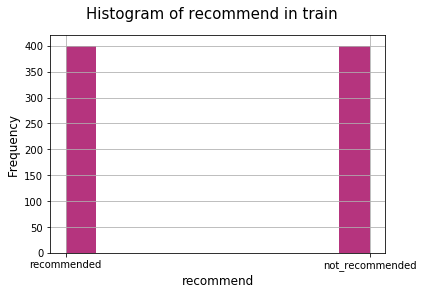

In [7]:
draw_histogram(test, 'train', 'recommend', '#b5347e')

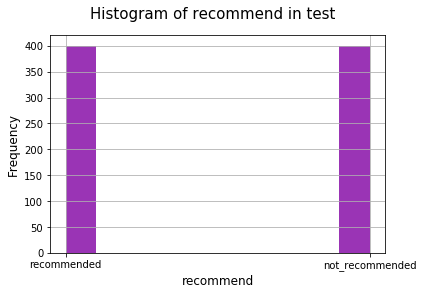

In [8]:
draw_histogram(test, 'test', 'recommend', '#9a34b5')

### Preprocessing Data

### Normalizing
<br/>
<div style="text-align: justify;"> 
In this part, we used Parsivar normalizer that converts persian digits to english digits, removes all white space and does other useful modifications. Also we have done some manual normalization tasks.
</div>

In [9]:
def normalize(self):
    #self.text = self.hazm_normalizer.normalize(self.text)
    self.text = self.parsivar_normalizer.normalize(self.text)
    self.text = ''.join([i for i in self.text if not i.isdigit()])
    self.text = re.sub(r'\s*[A-Za-z]+\b', '' , self.text)
    self.text = self.text.replace("\n", " ")
    self.text = self.text.replace("فک", "فکر")
    self.text = self.text.replace("رو", "را")
    self.text = self.text.replace("خوا", "خواه", 1)
    self.text = self.text.replace("دگ", "دیگر")
    self.text = self.text.replace(" برا", " برای")
    self.text = self.text.replace("همون", "همان")
    self.text = self.text.replace("خونه", "خانه")
    self.text = self.text.replace("  اما ", " ولی")
    self.text = self.text.replace("گه", "گاه")
    self.text = self.text.replace("تون ", "تان ")
    self.text = self.text.replace("تون", "توان")

### Stemming
<br/>
<div style="text-align: justify;"> 
In this part, we used Hazm Stemmer in order to remove or stem the last few characters of the words that are not important such as ها in کتاب‌ها.
</div>

In [10]:
def stem(self):
    self.word_list = [self.stemmer.stem(word) for word in self.word_list]

### Lemmatizing
<br/>
<div style="text-align: justify;"> 
In this part, we used Hazm Lemmatizer in order to convert the word to its meaningful base form, which is called Lemma.
</div>

In [11]:
def lemmatize(self):
    self.word_list = [self.lemmatizer.lemmatize(word) for word in self.word_list]

### Tokenizing
<br/>
<div style="text-align: justify;"> 
Tokenizing is defined as a process to split the text into smaller units, i.e., tokens, perhaps at the same time throwing away certain characters, such as punctuation. Tokens could be words, numbers, symbols, n-grams, or characters. N-grams are a combination of n words or characters together. Tokenizing does this task by locating word boundaries. 
    
In this part, we user Parsivar Tokenizer in order to convert text to a list of words.
</div>

In [12]:
def word_tokenize(self):
    self.word_list = self.tokenizer.tokenize_words(self.text)

In [13]:
def just_tokenize(self, text):
    return text.split()

### Removing Stop Words
<br/>
<div style="text-align: justify;"> 
stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. 

In this part, we removed stop words from the given data to increase the accuray of our model.
</div>

In [14]:
def remove_stop_words(self):
    words = []
    for word in self.word_list:
        if "#" in word: 
            lem = word.split("#")
            if len(lem) == 2:
                if lem[0] in self.stop_words or lem[1] in self.stop_words:
                    word = ""
                else:
                    word = lem[1]
        if word[:-1] in self.stop_words:
            word = ""
            
        if word.replace("می", "می\u200c", 1) in self.stop_words:
            word = ""
            
        if len(word) >= MIN_LEN and word[-1] == "ن":
            edited = word[:-1] + "لا"  # اصن -> اصلاً
            if edited in self.stop_words:
                word = "" 
            
        if word in self.stop_words:
            word = ""
            
        if word:
            word = word.replace(u"\u200c", "")
            if len(word) >= MIN_LEN:
                words.append(word)
            
    self.word_list = words

In [15]:
def run(self, text):
    self.text = text
    self.normalize()
    self.word_tokenize()
    self.stem()
    self.lemmatize()
    self.remove_stop_words()
    return self.word_list

### Preprocessor Class
<br/>
<div style="text-align: justify;"> 
In this part, we defined a class to do preprocessing tasks on a given text that we mentioned above.
</div>

In [16]:
class Preprocessor:
    def __init__(self):
        self.text = ''
        self.word_list = []
        self.hazm_normalizer = hazm.Normalizer()
        self.parsivar_normalizer = parsivar.Normalizer()
        self.tokenizer = parsivar.Tokenizer()
        self.stemmer = hazm.Stemmer()
        self.lemmatizer = hazm.Lemmatizer()
        self.stop_words = set(hazm.stopwords_list("persian"))
        
    normalize = normalize
    stem = stem
    lemmatize = lemmatize
    remove_stop_words = remove_stop_words
    run = run
    word_tokenize = word_tokenize
    just_tokenize = just_tokenize

In [17]:
def preprocess(self):
    self.train['comment'] = self.train['comment'].apply(self.preprocessor.run)
    self.train['title'] = self.train['title'].apply(self.preprocessor.run)
    self.test['comment'] = self.test['comment'].apply(self.preprocessor.run)
    self.test['title'] = self.test['title'].apply(self.preprocessor.run)

### Modeling the Problem
In this part, we used bag of words model that is kind of a frequeny base model to do the classification task.

In [18]:
def extract_words(self, column):
    data = self.train[[column, 'recommend']]
    data = pd.DataFrame({col:np.repeat(data[col].values, data[column].str.len())\
              for col in data.columns.difference([column])}).assign\
                (**{column:np.concatenate(data[column].values)})[data.columns.tolist()]
    
    data.columns = ['word', 'recommend']
    data_recommended = data[(data.recommend == 'recommended')][['word']]
    data_not_recommended = data[(data.recommend == 'not_recommended')][['word']]
    
    self.recommended = self.recommended.append(data_recommended, ignore_index=True)
    self.not_recommended = self.not_recommended.append(data_not_recommended, ignore_index=True)

In [19]:
def extract_training_words(self):
    self.extract_words('comment')
    self.extract_words('title')

### Computing Frequencies
<br/>
<div style="text-align: justify;"> 
In this part, we computed the frequency of words in each class in the trainig data.
</div>

In [20]:
def compute_frequencies(self):
    self.recommended['frequency'] = self.recommended['word']\
    .map(self.recommended['word'].value_counts())
    
    self.not_recommended['frequency'] = self.not_recommended['word']\
    .map(self.not_recommended['word'].value_counts())
    
    self.recommended.drop_duplicates(inplace = True)
    self.not_recommended.drop_duplicates(inplace = True)
    
    self.not_recommended.reset_index(drop=True, inplace=True)
    self.recommended.reset_index(drop=True, inplace=True)

### Computing Probabilities
<br/>
<div style="text-align: justify;"> 
In this part, we computed the likelihood of each word in the training data for the given class.
</div>

In [21]:
def compute_probabilities(self):
    self.k = len(pd.concat([self.recommended,self.not_recommended]).drop_duplicates().reset_index(drop=True).index)
    if self.apply_smoothing:
        self.recommended['probability'] = (self.recommended['frequency'] + self.smooth)/\
        (self.recommended['frequency'].sum() + self.k * self.smooth)
        self.not_recommended['probability'] = (self.not_recommended['frequency'] + self.smooth)/\
        (self.not_recommended['frequency'].sum() + self.k * self.smooth)
    else:
        self.recommended['probability'] = (self.recommended['frequency'])/\
        (self.recommended['frequency'].sum())
        self.not_recommended['probability'] = (self.not_recommended['frequency'])/\
        (self.not_recommended['frequency'].sum())
    
    self.recommended = self.recommended.set_index('word')['probability'].to_dict()
    self.not_recommended = self.not_recommended.set_index('word')['probability'].to_dict()

### Additive Smoothing
<br/>
<div style="text-align: justify;"> 
In this part, we computed the likelihood of each word in the test data for the given class.
</div>

In [22]:
def compute_recommended_prob(self, word_list):
    if len(word_list) == 0:
        return 1 
    pos = 1
    for word in word_list:
        if word in self.recommended:
            pos *= self.recommended[word]
        elif self.apply_smoothing:
            pos *= self.smooth/(self.k * self.smooth)
        else:
            return 0
            
    return pos

In [23]:
def compute_not_recommended_prob(self, word_list):
    if len(word_list) == 0:
        return 1 
    neg = 1
    for word in word_list:
        if word in self.not_recommended:
            neg *= self.not_recommended[word]
        elif self.apply_smoothing:
            neg *= self.smooth/(self.k * self.smooth)
        else:
            return 0

    return neg

### Classifying
<br/>
<div style="text-align: justify;"> 
In this part, we classified each comment with its title based on the probabilities that we computed in the previous parts.
</div>

In [24]:
def classify(self):
    self.test['recommended_prob'] = self.p_recommended*self.test['comment'].\
        apply(self.compute_recommended_prob)*self.test['title'].apply(self.compute_recommended_prob)
 
    self.test['not_recommended_prob'] = self.p_not_recommended*self.test['comment'].\
        apply(self.compute_not_recommended_prob)*self.test['title'].apply(self.compute_not_recommended_prob)
    
    self.test['guess'] = np.where((self.test['recommended_prob'] >= self.test['not_recommended_prob']),\
                                  'recommended', 'not_recommended')

### Evaluating Model
In this part, we evaluate the model based on the parameters such as accuracy, precision and recall.  

<b>Accuray</b> is the number of the correct detections divided by the total number of detection.
    
<b>Precision</b> is the number of correct recommended detections divided by the total number of recommended detections including wrong ones.
    
<b>Recall</b> is the number of correct recommended detections divided by the total number of recommended in test data. 

<b>F1 Score</b> is the harmonic mean of the recall and precision.

In [25]:
def evaluate_model(self):
    TN = 0
    TP = 0
    FN = 0
    FP = 0
    
    for index, row in self.test.iterrows():
        if row['recommend'] == 'recommended' and row['guess'] == 'recommended':
            TP += 1
        if row['recommend'] == 'not_recommended' and row['guess'] == 'not_recommended':
            TN += 1
        if row['recommend'] == 'not_recommended' and row['guess'] == 'recommended':
            FP += 1
        if row['recommend'] == 'recommended' and row['guess'] == 'not_recommended':
            FN += 1
        
    accuracy = 100 * (TN + TP)/(TP + TN + FN + FP)
    precision = 100 * TP/(TP + FP)
    recall = 100 * TP/(TP + FN)
    f1_score = (2 * precision * recall)/(precision + recall)
    
    self.accuracies.append(accuracy)
    self.precisions.append(precision)
    self.recalls.append(recall)
    self.f1_scores.append(f1_score)

### Plotting Parameters
In this part, we wrote a function to plot the parameters in 4 cases that are defined.

In [26]:
def draw_parameters(self):
    plt.figure(figsize=(20, 10))
    plt.title("Classification Methods")
    plt.plot(self.labels, self.accuracies, '-o', label="Accuracy", linewidth = 5, color = '#1691a7')
    plt.plot(self.labels, self.precisions, '-o', label="Precision", linewidth = 5, color = '#9a34b5')
    plt.plot(self.labels, self.recalls, '-o', label="Recall", linewidth = 5, color = '#e500a9')
    plt.plot(self.labels, self.f1_scores, '-o', label="F1_score", linewidth = 5, color = '#e5d700')
    plt.legend(loc="upper left")
    plt.show()

In [27]:
def store_wrongly_detected(self):
    counter = 0
    for index, row in self.test.iterrows():
        if row['recommend'] != row['guess']:
            counter += 1
            self.wrongly_samples.append([row['comment'], row['recommend'], row['guess']])
            if counter == WRONGLY_COUNT:
                break

In [28]:
def draw_result_histogram(self):
    draw_histogram(self.test, 'test', 'guess', '#1cc32f')

In [29]:
def print_evaluation_result(self):
    print(STARS, self.labels[LAST], STARS)
    print('Accuracy:', self.accuracies[LAST])
    print('Precision:', self.precisions[LAST])
    print('Recall:', self.recalls[LAST])
    print('F1_score:', self.f1_scores[LAST])

In [30]:
def start(self):
    if self.apply_preprocessing:
        self.preprocess()
    else:
        self.train['comment'] = self.train['comment'].apply(self.preprocessor.just_tokenize)
        self.train['title'] = self.train['title'].apply(self.preprocessor.just_tokenize)
        self.test['comment'] = self.test['comment'].apply(self.preprocessor.just_tokenize)
        self.test['title'] = self.test['title'].apply(self.preprocessor.just_tokenize)
        
    self.extract_training_words()
    self.compute_frequencies()
    self.compute_probabilities()
    self.classify()
    self.evaluate_model()
    self.print_evaluation_result()
    
    if self.apply_preprocessing and self.apply_smoothing:
        self.store_wrongly_detected()

In [31]:
def initialize(self, train, test, mode):
    self.train = train.copy()
    self.test = test.copy()
    self.p_recommended = len(self.train[(self.train['recommend']=='recommended')].\
                             index)/len(self.train.index)
    self.p_not_recommended = 1 - self.p_recommended
    self.recommended = pd.DataFrame(columns=['word'])
    self.not_recommended = pd.DataFrame(columns=['word'])

    self.labels.append(mode)

    if mode == JUST_PREPROCESS:
        self.apply_preprocessing = True
        self.apply_smoothing = False
        
    elif mode == JUST_SMOOTH:
        self.apply_preprocessing = False
        self.apply_smoothing = True
        
    elif mode == PREPROCESS_AND_SMOOTH:
        self.apply_smoothing = True
        self.apply_preprocessing = True
        
    else:
        self.apply_smoothing = False
        self.apply_preprocessing = False

### Printing Wrong Detections
In this part, we wrote a function to print 5 comments that our model detected wrongly.

In [32]:
def print_wrongly_samples(self):
    for i in range(WRONGLY_COUNT):
        print(i+1, DASH)
        print('Comment:', self.wrongly_samples[i][COMMENT])
        print('Actual:', self.wrongly_samples[i][ACTUAL], STARS, 'Detected:', self.wrongly_samples[i][DETECTED])   

### Printing Parameters
In this part, we wrote a function to print the evaluation parameters as a table.

In [33]:
def draw_parameter_table(self):
    table = PrettyTable(["Classification Method", "Accuracy", "Precision", "Recall", "F1_score"]) 
    table.add_row(["Preprocessing & Smoothing", "86.87", "85.54", "88.75", "87.12"]) 
    table.add_row(["Smoothing", "85.00", "80.57", "92.25", "86.01"]) 
    table.add_row(["Preprocessing", "88.12", "82.51", "96.75", "89.07"]) 
    table.add_row(["Nothing", "84.62", "76.89", "99.00", "86.56"])  
    print(table)

### Classifier Class
<br/>
<div style="text-align: justify;"> 
In this part, we defined a class to do classification tasks on a given text that we mentioned above.
</div>

In [34]:
class Classifier:
    def __init__(self):
        self.preprocessor = Preprocessor()
        self.smooth = SMOOTH
        self.k = 0
        self.accuracies = []
        self.f1_scores = []
        self.recalls = []
        self.precisions =[]
        self.labels = [] 
        self.wrongly_samples = []
        
        
    evaluate_model = evaluate_model
    preprocess = preprocess
    classify = classify
    compute_recommended_prob = compute_recommended_prob
    compute_not_recommended_prob = compute_not_recommended_prob
    extract_words = extract_words
    extract_training_words = extract_training_words
    compute_frequencies = compute_frequencies
    compute_probabilities = compute_probabilities
    print_evaluation_result = print_evaluation_result
    start = start
    draw_result_histogram = draw_result_histogram
    initialize = initialize
    draw_parameters = draw_parameters
    draw_parameter_table = draw_parameter_table
    store_wrongly_detected = store_wrongly_detected
    print_wrongly_samples = print_wrongly_samples

In [35]:
classifier = Classifier()
classifier.initialize(train, test, PREPROCESS_AND_SMOOTH)
classifier.start()

 *****  Preprocessing & Smoothing  ***** 
Accuracy: 86.875
Precision: 85.5421686746988
Recall: 88.75
F1_score: 87.11656441717791


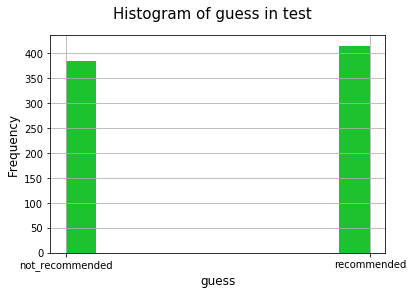

In [36]:
classifier.draw_result_histogram()

In [37]:
classifier.initialize(train, test, JUST_SMOOTH)
classifier.start()

 *****  Smoothing  ***** 
Accuracy: 85.0
Precision: 80.56768558951966
Recall: 92.25
F1_score: 86.01398601398601


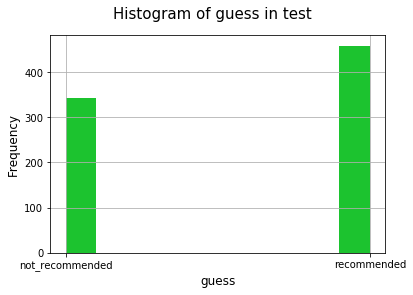

In [38]:
classifier.draw_result_histogram()

In [39]:
classifier.initialize(train, test, JUST_PREPROCESS)
classifier.start()

 *****  Preprocessing  ***** 
Accuracy: 88.125
Precision: 82.51599147121536
Recall: 96.75
F1_score: 89.06789413118527


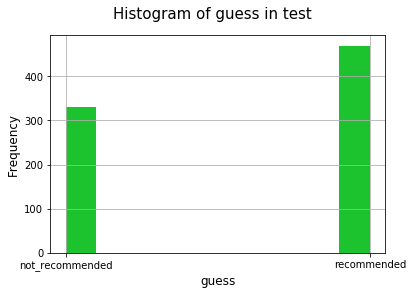

In [40]:
classifier.draw_result_histogram()

In [41]:
classifier.initialize(train, test, NOTHING)
classifier.start()

 *****  Nothing  ***** 
Accuracy: 84.625
Precision: 76.89320388349515
Recall: 99.0
F1_score: 86.55737704918033


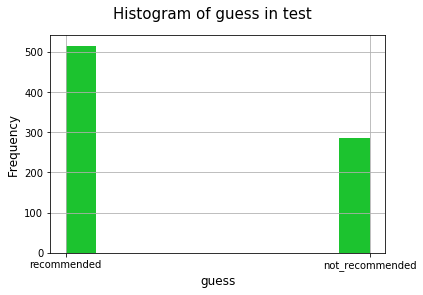

In [42]:
classifier.draw_result_histogram()

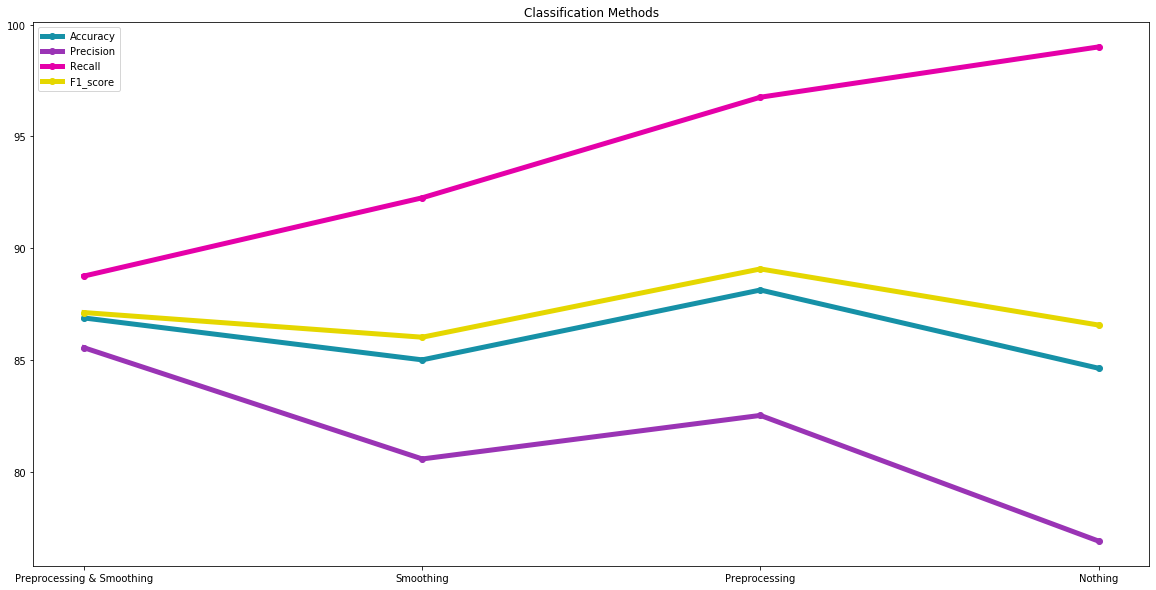

In [43]:
classifier.draw_parameters()

### Question #1

### Stemming and Lemmatizing
<br/>
<div style="text-align: justify;"> 
Stemming is a process where a word is reduced to its root by removing inflection through dropping unnecessary characters, usually a suffix. This technique could remove important information but also help us to normalize our corpus. Stemmer is easy to build than a lemmatizer as the latter requires deep linguistics knowledge in constructing dictionaries to look up the lemma of the word.
    
Unlike stemming, lemmatization reduces the words to a word existing in the language. In this technique, part of speech of the word is required. This helps in transforming the word into a proper root form. However, for doing so, it requires extra computational linguistics power such as a part of speech tagger.
</div>

### Question #2
#### Define these terms in the problem.

<img src="photos/prob.png"  width="400" height="400">

<br/>
<div style="text-align: justify;"> 
<b>Posterior</b> is the probability that the event c will occur given the knowledge that an event x has already occurred. In our context, posterior is the probability of the occurness of the class c given the word x. This can be computed by the given formula. We will compare this probability for both classes to choose one of the classes for the given comment.
    
<b>Prior</b> is the probability of the the class c. We know that the training data is symmetric. Therefore, we do not need to compute it and it will be 0.5. But if we didn't had this assumption, we could compute it by dividing the frequency of the class c by the sum of the frequency of all the classes in the training data.
    
<b>Likelihood</b> is the probability that the event x will occur given the knowledge that an event c has already occurred. In our context, likelihood is the probability of the occurness of the word x given the class c that can be one of the <i>recommended</i> and <i>not_recommended</i>. This probability can be computed by dividing the frequency of the word x in the class c by the sum of frequency of all the words in the class c.  
    
<b>Evidence</b> is the probability of the x used to update the prior. In our context, evidence is the probability of the occurness of the word x in the given text. It can be easily computed by dividing the frequency of the word x by the sum of the frequency of all the words in the text. But we do not need to compute this probability because we want to compare two classes and this parameter is same for both classes, so we can ignore it.
</div>

### Question #3

#### Why Smoothing is needed in Naive Bayes?
<br/>
<div style="text-align: justify;"> 
The frequency-based probability might introduce zeros when multiplying the probabilities, leading to a failure in preserving the information contributed by the non-zero probabilities. Therefore, a smoothing approach, for example, the Additive Smoothing, must be adopted to counter this problem. In the formula that is mentioned above, it is considered that the likelihood of words are idependent from each other. Therefore we multiplied them and if one of them were zero, the result would be zero and this is the reason of using the Additive Smoothing technique. 
</div>

### Question #4
#### Additive Smoothing 

<img src="photos/smooth.gif"  width="400" height="40">

<br/>
<div style="text-align: justify;"> 
Additive Smoothing is a technique to smooth categorical data. This technique is introduced to solve the problem of zero probability. A small-sample correction, or pseudo-count, will be incorporated in every probability estimate. Consequently, o probability will be zero. this is a way of regularizing Naive Bayes. Based on the formula, we have  a parameter called smoothing that is shown by lambda and K is the number of the unique words in the training data.
</div>

### Question #5

<br/>
<div style="text-align: justify;"> 
Usually, precision and recall scores are given together and are not quoted individually. This is because it is easy to vary the sensitivity of a model to improve precision at the expense of recall, or vice versa.    
    
<b>Example 1:</b> Consider a model that wrongly detects all the comments as not_recommended except one comment that is really recommended. Therefore the precision of this model will be 1. But it is not a good model. We conclude that the precision is not enough to evaluate a model.  
    
<b>Example 2:</b> Consider a model that wrongly detects all the comments as recommended. Therefore the racall of this model will be 1. But it is not a good model. We conclude that the recall is not enough to evaluate a model.
</div>

### Question #6

#### F1 Score
<br/>
<div style="text-align: justify;"> 
The F1 score is the harmonic mean of precision and recall taking both metrics into account. It uses the harmonic mean instead of a simple average because it punishes extreme values. A classifier with a precision of 1.0 and a recall of 0.0 has a simple average of 0.5 but an F1 score of 0. 
</div>

### Question #7

In [44]:
classifier.draw_parameter_table()

+---------------------------+----------+-----------+--------+----------+
|   Classification Method   | Accuracy | Precision | Recall | F1_score |
+---------------------------+----------+-----------+--------+----------+
| Preprocessing & Smoothing |  86.87   |   85.54   | 88.75  |  87.12   |
|         Smoothing         |  85.00   |   80.57   | 92.25  |  86.01   |
|       Preprocessing       |  88.12   |   82.51   | 96.75  |  89.07   |
|          Nothing          |  84.62   |   76.89   | 99.00  |  86.56   |
+---------------------------+----------+-----------+--------+----------+


### Question #8

<div style="text-align: justify;"> 
Based on the results, by using the preprocessing, accuray and precision of our model has been improved. It is undeniable that this technique normalizes our data in three ways: 
    
1- Adds attributes to our data  
2- Removes attributes from our data  
3- Transforms attributes in our data  

Also, by using the Additive Smoothing, precision and accuracy of our model has been improved.
    
Moreover, we can see that F1 score lies between precision and recall and it is rational because it is the harmonic mean of them. It has been increased by applying the preprocessing but decreased by applying the additive smoothing.

Finally, we can see that when neither preprocessing nor smoothing has been applied to our model, we achieved a very high recall because when ever the probability of the two class are the samem we choose the recommended class and this situation occurs in this case. 
    
To sum up, Preprocessing and Smoothing are good methods to improve our classification model.
    
</div>

### Question #9

In [45]:
classifier.print_wrongly_samples()

1 -
Comment: ['خرید', 'کار', 'مشخص', 'میشه']
Actual: recommended  *****  Detected: not_recommended
2 -
Comment: ['قیم', 'گزینه', 'میشه', 'گرف', 'مینویسه', 'مناسب', 'نیس', 'رنگ', 'میده', 'وقتا', 'موقع', 'نوشتن']
Actual: not_recommended  *****  Detected: recommended
3 -
Comment: ['سلا', 'کابل', 'شارژ', 'توصیه', 'ارز', 'شارژ', 'وایرلس', 'مجهز']
Actual: recommended  *****  Detected: not_recommended
4 -
Comment: ['کاور', 'مقاو', 'قشنگیه', 'زیادیه', 'ناموجوده', '...', 'موجود', 'بشه', 'سفار', 'مید', 'رنگ', 'طلا', 'فوقالعاده', 'زیباس', 'طراح', 'نحویه', 'نمیکنه', 'موجود', 'بشه', 'ممنون']
Actual: not_recommended  *****  Detected: recommended
5 -
Comment: ['ادو', 'تویلتو', 'خرید', 'خلاف', 'نوشته', 'خنک', 'خیل', 'خنک', 'نیس', 'کارامل', 'خیل', 'غالبه', 'انتظار', 'غالب', 'زیباس', 'مانگار', 'خیل']
Actual: recommended  *****  Detected: not_recommended


#### Comment #1
In this comment we can not see positive or negative words to lead our model to a logical detection. So, because of that our model detected this comment wrongly.
#### Comment #2
In this comment we can see some positive nouns and verbs but there is only one negative verb. So, because of that our model detected this comment wrongly.
#### Comment #3
In this comment we can see that most of the words does not show user's opinion about the product.They only describe the product by its dmain terms. So, because of that our model detected this comment wrongly.
#### Comment #4
In this comment we can see many positive words and some negative words. Our model detected this comment as recommended because it considers the majority of the word. If this model could analyze the structure of the sentences in the comment, it would predict this comment correctly.
#### Comment #5
In this comment we can see many positive words but they are not in their basic form and this miss detection occurs because our model is not very clever at normalizing the comment.

### Conclusion
<br/>
<div style="text-align: justify;"> 
In this computer assignment we learned that naive bayes is a good method to solve classification problems. Also we were introduced to some metrics to evaluate our classification results. 
</div>